# Customer Cluster Analysis at Green Kia Dodge Subaru

## Table of Contents

1. Import CSV <br>
2. Exploratory Data Analysis and Data Cleaning <br>

In [1]:
#import packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn libraries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.pipeline import make_pipeline

# Scikit-Learn's KMeans algorithm (added later)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# PCA from Scikit-Learn (added later)
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE #T-Distributed Stochastic

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from sklearn.cluster import KMeans #K-Means Clustering

## Import CSV

In [2]:
#read in csv

df = pd.read_csv("/Users/humzakhan/Metis/Metis_Projects/Metis_Project_5/All Sold Customers.csv")
df.head()

,Postal Code,VIN,Stock Num,MSRP,Year,Make,Model,Ext. Warranty Miles,Lender,Purchase Date,Sales Type,Purchase Type,Sale Price
0,62702-3468,KNAFK4A66E5066042,K28238A,"$18,315.00",2014,KIA,FORTE,100391,HEARTLAND CREDIT UNION,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00"
1,62704,3C4PDCAB3HT601812,29220,"$22,339.00",2017,DODGE,JOURNEY (2.4L),100000,NaN,3/11/2017 0:00,New Vehicle,Cash,"$22,025.00"
2,62711-7293,4S3BMCC6XC3018572,43784,"$23,500.00",2012,SUBARU,LEGACY 2.5I,48000,CONVERSION - DO NOT USE,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00"
3,62563,3C4PDCAB2HT602126,29320,"$24,680.00",2017,DODGE,JOURNEY,0,ALLY FINANCIAL,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00"
4,62668,5XYKT3A16DG361547,44718B,"$18,994.00",2013,KIA,SORENTO,0,HEARTLAND CREDIT UNION,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00"


## Exploratory Data Analysis and Data Cleaning

In [3]:
df.shape

(16627, 13)

In [4]:
df.columns

Index(['Postal Code', 'VIN', 'Stock Num', 'MSRP', 'Year', 'Make', 'Model',
       'Ext. Warranty Miles', 'Lender', 'Purchase Date', 'Sales Type',
       'Purchase Type', 'Sale Price'],
      dtype='object')

In [5]:
df.dtypes

Postal Code            object
VIN                    object
Stock Num              object
MSRP                   object
Year                    int64
Make                   object
Model                  object
Ext. Warranty Miles     int64
Lender                 object
Purchase Date          object
Sales Type             object
Purchase Type          object
Sale Price             object
dtype: object

In [6]:
#will only show numerical columns

df.describe()

,Year,Ext. Warranty Miles
count,16627.000000,16627.000000
mean,2012.661394,27204.383593
std,4.660994,42452.372353
min,1984.000000,0.000000
25%,2010.000000,0.000000
50%,2013.000000,0.000000
75%,2016.000000,75000.000000
max,2021.000000,999999.000000


In [7]:
#check for null values

df.isnull().values.any()

True

In [8]:
#sum of null values in each column

df.isnull().sum()

Postal Code               0
VIN                       0
Stock Num               246
MSRP                      0
Year                      0
Make                      0
Model                     0
Ext. Warranty Miles       0
Lender                 1541
Purchase Date             0
Sales Type              217
Purchase Type           217
Sale Price                0
dtype: int64

In [9]:
#dropping null values in Purchase Type column. Entire row does not have data on car purchase

df = df.dropna(subset=['Purchase Type'])
df.shape

(16410, 13)

In [10]:
#show top 5 rows

df.head()

,Postal Code,VIN,Stock Num,MSRP,Year,Make,Model,Ext. Warranty Miles,Lender,Purchase Date,Sales Type,Purchase Type,Sale Price
0,62702-3468,KNAFK4A66E5066042,K28238A,"$18,315.00",2014,KIA,FORTE,100391,HEARTLAND CREDIT UNION,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00"
1,62704,3C4PDCAB3HT601812,29220,"$22,339.00",2017,DODGE,JOURNEY (2.4L),100000,NaN,3/11/2017 0:00,New Vehicle,Cash,"$22,025.00"
2,62711-7293,4S3BMCC6XC3018572,43784,"$23,500.00",2012,SUBARU,LEGACY 2.5I,48000,CONVERSION - DO NOT USE,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00"
3,62563,3C4PDCAB2HT602126,29320,"$24,680.00",2017,DODGE,JOURNEY,0,ALLY FINANCIAL,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00"
4,62668,5XYKT3A16DG361547,44718B,"$18,994.00",2013,KIA,SORENTO,0,HEARTLAND CREDIT UNION,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00"


In [11]:
#replacing null values in LENDER column with Cash

df["Lender"].fillna("Cash", inplace = True)
df.head()

,Postal Code,VIN,Stock Num,MSRP,Year,Make,Model,Ext. Warranty Miles,Lender,Purchase Date,Sales Type,Purchase Type,Sale Price
0,62702-3468,KNAFK4A66E5066042,K28238A,"$18,315.00",2014,KIA,FORTE,100391,HEARTLAND CREDIT UNION,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00"
1,62704,3C4PDCAB3HT601812,29220,"$22,339.00",2017,DODGE,JOURNEY (2.4L),100000,Cash,3/11/2017 0:00,New Vehicle,Cash,"$22,025.00"
2,62711-7293,4S3BMCC6XC3018572,43784,"$23,500.00",2012,SUBARU,LEGACY 2.5I,48000,CONVERSION - DO NOT USE,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00"
3,62563,3C4PDCAB2HT602126,29320,"$24,680.00",2017,DODGE,JOURNEY,0,ALLY FINANCIAL,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00"
4,62668,5XYKT3A16DG361547,44718B,"$18,994.00",2013,KIA,SORENTO,0,HEARTLAND CREDIT UNION,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00"


In [12]:
#recheck sum of null values in each column

df.isnull().sum()

Postal Code             0
VIN                     0
Stock Num              29
MSRP                    0
Year                    0
Make                    0
Model                   0
Ext. Warranty Miles     0
Lender                  0
Purchase Date           0
Sales Type              0
Purchase Type           0
Sale Price              0
dtype: int64

In [13]:
#dropping VIN, Model and Stock columns

df = df.drop(columns=['VIN','Stock Num','Lender'])

In [14]:
df.head()

,Postal Code,MSRP,Year,Make,Model,Ext. Warranty Miles,Purchase Date,Sales Type,Purchase Type,Sale Price
0,62702-3468,"$18,315.00",2014,KIA,FORTE,100391,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00"
1,62704,"$22,339.00",2017,DODGE,JOURNEY (2.4L),100000,3/11/2017 0:00,New Vehicle,Cash,"$22,025.00"
2,62711-7293,"$23,500.00",2012,SUBARU,LEGACY 2.5I,48000,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00"
3,62563,"$24,680.00",2017,DODGE,JOURNEY,0,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00"
4,62668,"$18,994.00",2013,KIA,SORENTO,0,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00"


In [15]:
# #overwriting column with CONVERSION - DO NOT USE with Cash
# df["Lender"] = df["Lender"].replace("CONVERSION - DO NOT USE", "Cash")

# #creating filter
# filter = df["Lender"] == "Cash"

# #printing only filtered columns
# df.where(filter).dropna()

In [16]:
#checking to see if change worked
#df.Lender

In [17]:
df.head()

,Postal Code,MSRP,Year,Make,Model,Ext. Warranty Miles,Purchase Date,Sales Type,Purchase Type,Sale Price
0,62702-3468,"$18,315.00",2014,KIA,FORTE,100391,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00"
1,62704,"$22,339.00",2017,DODGE,JOURNEY (2.4L),100000,3/11/2017 0:00,New Vehicle,Cash,"$22,025.00"
2,62711-7293,"$23,500.00",2012,SUBARU,LEGACY 2.5I,48000,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00"
3,62563,"$24,680.00",2017,DODGE,JOURNEY,0,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00"
4,62668,"$18,994.00",2013,KIA,SORENTO,0,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00"


In [18]:
#create new column in df called warranty miles that takes existing column ext. warranty miles inputs 1 or 0

df["Warranty Miles"] = np.where(df["Ext. Warranty Miles"] > 0, 1, 0)
df.head()

,Postal Code,MSRP,Year,Make,Model,Ext. Warranty Miles,Purchase Date,Sales Type,Purchase Type,Sale Price,Warranty Miles
0,62702-3468,"$18,315.00",2014,KIA,FORTE,100391,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00",1
1,62704,"$22,339.00",2017,DODGE,JOURNEY (2.4L),100000,3/11/2017 0:00,New Vehicle,Cash,"$22,025.00",1
2,62711-7293,"$23,500.00",2012,SUBARU,LEGACY 2.5I,48000,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00",1
3,62563,"$24,680.00",2017,DODGE,JOURNEY,0,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00",0
4,62668,"$18,994.00",2013,KIA,SORENTO,0,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00",0


In [19]:
df.Make.unique()

array(['KIA', 'DODGE', 'SUBARU', 'DODGE TRUCK', 'RAM', 'CHRYSLER',
       'VOLKSWAGEN', 'JEEP', 'FORD', 'HONDA', 'GMC', 'CHEVROLET',
       'TOYOTA', 'NISSAN', 'HYUNDAI', 'MITSUBISHI', 'TOYOTA TRUCK',
       'MAZDA', 'MERCURY', 'BUICK', 'CADILLAC', 'FORD TRUCK',
       'CHEVROLET TRUCK', 'MERCEDES-BENZ', 'MERCURY TRUCK', 'SATURN',
       'NISSAN TRUCK', 'PONTIAC', 'LINCOLN', 'FIAT', 'MINI', 'BMW SAV',
       'VOLVO', 'LINCOLN TRUCK', 'LEXUS', 'OLDSMOBILE', 'BMW', 'SUZUKI',
       'INFINITI', 'LAND ROVER', 'JAGUAR', 'ACURA', 'CADILLAC TRUCK',
       'AUDI', 'PLYMOUTH', 'HUMMER', 'SAAB', 'SUZUKI MPV', 'OTHER MAKE',
       'HARLEY DAVIDSON', 'MV', 'PORSCHE', 'VICTORY', 'MAZDA TRUCK',
       'DAEWOO', 'BIG DOG', 'MINI COOPER', 'SUZUKI MC', 'KAWASAKI',
       'Toyota', 'Subaru', 'Kia', 'Ram', 'Chevrolet', 'Hyundai', 'ISUZU',
       'YAMAHA', 'EAGLE', 'SCION', 'Jeep', 'Dodge', 'Ford', 'Nissan',
       'Honda', 'Mitsubishi', 'Chrysler', 'Mercedes-Benz',
       'Harley-Davidson', 'Acura', 'Bui

In [20]:
df.head()

,Postal Code,MSRP,Year,Make,Model,Ext. Warranty Miles,Purchase Date,Sales Type,Purchase Type,Sale Price,Warranty Miles
0,62702-3468,"$18,315.00",2014,KIA,FORTE,100391,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00",1
1,62704,"$22,339.00",2017,DODGE,JOURNEY (2.4L),100000,3/11/2017 0:00,New Vehicle,Cash,"$22,025.00",1
2,62711-7293,"$23,500.00",2012,SUBARU,LEGACY 2.5I,48000,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00",1
3,62563,"$24,680.00",2017,DODGE,JOURNEY,0,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00",0
4,62668,"$18,994.00",2013,KIA,SORENTO,0,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00",0


In [21]:
#create list for all cars
all_cars = list(df.Make.unique())

all_cars

['KIA',
 'DODGE',
 'SUBARU',
 'DODGE TRUCK',
 'RAM',
 'CHRYSLER',
 'VOLKSWAGEN',
 'JEEP',
 'FORD',
 'HONDA',
 'GMC',
 'CHEVROLET',
 'TOYOTA',
 'NISSAN',
 'HYUNDAI',
 'MITSUBISHI',
 'TOYOTA TRUCK',
 'MAZDA',
 'MERCURY',
 'BUICK',
 'CADILLAC',
 'FORD TRUCK',
 'CHEVROLET TRUCK',
 'MERCEDES-BENZ',
 'MERCURY TRUCK',
 'SATURN',
 'NISSAN TRUCK',
 'PONTIAC',
 'LINCOLN',
 'FIAT',
 'MINI',
 'BMW SAV',
 'VOLVO',
 'LINCOLN TRUCK',
 'LEXUS',
 'OLDSMOBILE',
 'BMW',
 'SUZUKI',
 'INFINITI',
 'LAND ROVER',
 'JAGUAR',
 'ACURA',
 'CADILLAC TRUCK',
 'AUDI',
 'PLYMOUTH',
 'HUMMER',
 'SAAB',
 'SUZUKI MPV',
 'OTHER MAKE',
 'HARLEY DAVIDSON',
 'MV',
 'PORSCHE',
 'VICTORY',
 'MAZDA TRUCK',
 'DAEWOO',
 'BIG DOG',
 'MINI COOPER',
 'SUZUKI MC',
 'KAWASAKI',
 'Toyota',
 'Subaru',
 'Kia',
 'Ram',
 'Chevrolet',
 'Hyundai',
 'ISUZU',
 'YAMAHA',
 'EAGLE',
 'SCION',
 'Jeep',
 'Dodge',
 'Ford',
 'Nissan',
 'Honda',
 'Mitsubishi',
 'Chrysler',
 'Mercedes-Benz',
 'Harley-Davidson',
 'Acura',
 'Buick',
 'Mazda',
 'Volkswag

In [22]:
#consolidate all brands into five categories: KIA, SUBARU, DODGE, RAM, OTHER

for car in all_cars:
    if car == "KIA" or car == "Kia":
        df.Make.replace(car, 'KIA', inplace=True)
    elif car == "DODGE" or car == "Dodge":
        df.Make.replace(car, 'DODGE', inplace=True)
    elif car == "SUBARU" or car == "Subaru":
        df.Make.replace(car, 'SUBARU', inplace=True)
    elif car == "DODGE TRUCK" or car == "RAM" or car == "Ram":
        df.Make.replace(car, 'RAM', inplace=True)
    else:
        df.Make.replace(car, 'OTHER', inplace=True)
df.Make.unique()

array(['KIA', 'DODGE', 'SUBARU', 'RAM', 'OTHER'], dtype=object)

In [23]:
df.head()

,Postal Code,MSRP,Year,Make,Model,Ext. Warranty Miles,Purchase Date,Sales Type,Purchase Type,Sale Price,Warranty Miles
0,62702-3468,"$18,315.00",2014,KIA,FORTE,100391,11/16/2013 0:00,Used Vehicle,Finance,"$17,200.00",1
1,62704,"$22,339.00",2017,DODGE,JOURNEY (2.4L),100000,3/11/2017 0:00,New Vehicle,Cash,"$22,025.00",1
2,62711-7293,"$23,500.00",2012,SUBARU,LEGACY 2.5I,48000,5/19/2012 0:00,Used Vehicle,Cash,"$23,500.00",1
3,62563,"$24,680.00",2017,DODGE,JOURNEY,0,4/14/2017 0:00,New Vehicle,Finance,"$24,680.00",0
4,62668,"$18,994.00",2013,KIA,SORENTO,0,5/16/2015 0:00,Used Vehicle,Finance,"$18,994.00",0


In [24]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns=['Purchase Type', 'Sales Type'])

# Display first 10 rows
df.head(10)

,Postal Code,MSRP,Year,Make,Model,Ext. Warranty Miles,Purchase Date,Sale Price,Warranty Miles,Purchase Type_Cash,Purchase Type_Finance,Purchase Type_Lease,Sales Type_New Vehicle,Sales Type_Used Vehicle
0,62702-3468,"$18,315.00",2014,KIA,FORTE,100391,11/16/2013 0:00,"$17,200.00",1,0,1,0,0,1
1,62704,"$22,339.00",2017,DODGE,JOURNEY (2.4L),100000,3/11/2017 0:00,"$22,025.00",1,1,0,0,1,0
2,62711-7293,"$23,500.00",2012,SUBARU,LEGACY 2.5I,48000,5/19/2012 0:00,"$23,500.00",1,1,0,0,0,1
3,62563,"$24,680.00",2017,DODGE,JOURNEY,0,4/14/2017 0:00,"$24,680.00",0,0,1,0,1,0
4,62668,"$18,994.00",2013,KIA,SORENTO,0,5/16/2015 0:00,"$18,994.00",0,0,1,0,0,1
5,62704-3288,"$49,364.00",2016,RAM,RAM 1500,0,11/19/2016 0:00,"$45,407.00",0,0,1,0,1,0
6,62558,"$15,000.00",2007,DODGE,GRAND CARAVAN,0,6/28/2010 0:00,"$15,000.00",0,1,0,0,0,1
7,62704-4629,"$34,420.00",2015,SUBARU,OUTBACK,0,11/24/2014 0:00,"$34,420.00",0,1,0,0,0,1
8,61925-8400,"$38,870.00",2018,SUBARU,OUTBACK,0,3/10/2018 0:00,"$36,000.00",0,0,1,0,0,1
9,62703,"$26,729.00",2019,DODGE,JOURNEY,75000,7/20/2019 0:00,"$26,729.00",1,0,1,0,1,0


In [25]:
#create new list for cars
consolidated_cars = list(df.Make.unique())

consolidated_cars

['KIA', 'DODGE', 'SUBARU', 'RAM', 'OTHER']

In [26]:
#create classes before we start modeling
#KIA = 0
#DODGE = 1
#RAM = 2
#SUBARU = 3
#OTHER = 4

for car in consolidated_cars:
    if car == "KIA":
        df.Make.replace(car, 0, inplace=True)
    elif car == "DODGE":
        df.Make.replace(car, 1, inplace=True)
    elif car == "RAM":
        df.Make.replace(car, 2, inplace=True)
    elif car == "SUBARU":
        df.Make.replace(car, 3, inplace=True)
    elif car == "OTHER":
        df.Make.replace(car, 4, inplace=True)
df.Make.unique()

array([0, 1, 3, 2, 4])

In [27]:
df.dtypes

Postal Code                object
MSRP                       object
Year                        int64
Make                        int64
Model                      object
Ext. Warranty Miles         int64
Purchase Date              object
Sale Price                 object
Warranty Miles              int64
Purchase Type_Cash          uint8
Purchase Type_Finance       uint8
Purchase Type_Lease         uint8
Sales Type_New Vehicle      uint8
Sales Type_Used Vehicle     uint8
dtype: object

In [28]:
df.head()

,Postal Code,MSRP,Year,Make,Model,Ext. Warranty Miles,Purchase Date,Sale Price,Warranty Miles,Purchase Type_Cash,Purchase Type_Finance,Purchase Type_Lease,Sales Type_New Vehicle,Sales Type_Used Vehicle
0,62702-3468,"$18,315.00",2014,0,FORTE,100391,11/16/2013 0:00,"$17,200.00",1,0,1,0,0,1
1,62704,"$22,339.00",2017,1,JOURNEY (2.4L),100000,3/11/2017 0:00,"$22,025.00",1,1,0,0,1,0
2,62711-7293,"$23,500.00",2012,3,LEGACY 2.5I,48000,5/19/2012 0:00,"$23,500.00",1,1,0,0,0,1
3,62563,"$24,680.00",2017,1,JOURNEY,0,4/14/2017 0:00,"$24,680.00",0,0,1,0,1,0
4,62668,"$18,994.00",2013,0,SORENTO,0,5/16/2015 0:00,"$18,994.00",0,0,1,0,0,1


In [29]:
df_new = df.copy()

In [30]:
#remove $ and comma to convert from string to float

df_new['Sale Price'] = df_new['Sale Price'].str.replace(',', '')
df_new['Sale Price'] = df_new['Sale Price'].str.replace('$', '')

df_new['MSRP'] = df_new['MSRP'].str.replace(',', '')
df_new['MSRP'] = df_new['MSRP'].str.replace('$', '')

<ipython-input-30-c38037f59f6a>:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-30-c38037f59f6a>:7: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [31]:
#change string to float MSRP and Sale Price

# df_new['Sale Price'] = pd.to_numeric(df_new['Sale Price'].str[2:],errors='coerce')
# df_new['MSRP'] = pd.to_numeric(df_new['MSRP'].str[2:],errors='coerce')
df_new.head()

,Postal Code,MSRP,Year,Make,Model,Ext. Warranty Miles,Purchase Date,Sale Price,Warranty Miles,Purchase Type_Cash,Purchase Type_Finance,Purchase Type_Lease,Sales Type_New Vehicle,Sales Type_Used Vehicle
0,62702-3468,18315.00,2014,0,FORTE,100391,11/16/2013 0:00,17200.00,1,0,1,0,0,1
1,62704,22339.00,2017,1,JOURNEY (2.4L),100000,3/11/2017 0:00,22025.00,1,1,0,0,1,0
2,62711-7293,23500.00,2012,3,LEGACY 2.5I,48000,5/19/2012 0:00,23500.00,1,1,0,0,0,1
3,62563,24680.00,2017,1,JOURNEY,0,4/14/2017 0:00,24680.00,0,0,1,0,1,0
4,62668,18994.00,2013,0,SORENTO,0,5/16/2015 0:00,18994.00,0,0,1,0,0,1


In [32]:
df_new.dtypes

Postal Code                object
MSRP                       object
Year                        int64
Make                        int64
Model                      object
Ext. Warranty Miles         int64
Purchase Date              object
Sale Price                 object
Warranty Miles              int64
Purchase Type_Cash          uint8
Purchase Type_Finance       uint8
Purchase Type_Lease         uint8
Sales Type_New Vehicle      uint8
Sales Type_Used Vehicle     uint8
dtype: object

In [33]:
df_new.MSRP = df_new.MSRP.astype(float)

In [34]:
df_new['Sale Price'] = df_new['Sale Price'].astype(float)

In [35]:
#copy Model column
df_new['Model Type'] = df_new['Model']

#make upper case
df_new['Model Type'] = df_new['Model Type'].str.upper()

#create list
models = list(df_new['Model Type'].unique())
models

['FORTE',
 'JOURNEY (2.4L)',
 'LEGACY 2.5I',
 'JOURNEY',
 'SORENTO',
 'RAM 1500',
 'GRAND CARAVAN',
 'OUTBACK',
 'IMPREZA WAGON',
 'CROSSTREK',
 'OUTBACK 2.5I',
 'ASCENT',
 'OPTIMA',
 'SEDONA',
 '2500',
 'SOUL',
 '2500 (6.4L)',
 'LEGACY',
 'FORESTER',
 'PACIFICA',
 '1500',
 'GRAND CARAVAN (3.6L)',
 'IMPREZA',
 'CHARGER',
 'BEETLE COUPE',
 'OUTBACK WAGON',
 'COMPASS (2.4L)',
 'ESCAPE',
 'F-150',
 'CHALLENGER',
 'NIRO',
 '1500 (5.7L)',
 'AVENGER',
 'RAM P/U 1500',
 'SPORTAGE',
 'RIDGELINE',
 'FORESTER 2.5X',
 'SIERRA 1500',
 '1500 DIESEL (3.0L)',
 'DURANGO',
 'AVALANCHE',
 'PATRIOT (2.0L)',
 'COLORADO',
 'C-HR',
 'WRX',
 'CAMARO',
 'RAM 1500 (3.7L)',
 'FORESTER 2.5I',
 'RAM CARGO VAN',
 'ALTIMA',
 'SONATA',
 'XV CROSSTREK',
 'GRAND CHEROKEE (3.6L)',
 '2500 DIESEL (6.7L)',
 'DURANGO (3.6L)',
 'EXPEDITION',
 'SILVERADO 1500',
 'RAM 2500',
 'RIO',
 'AMANTI',
 'TOWN & COUNTRY (3.6L)',
 'CHALLENGER (3.6L)',
 'OUTLANDER SPORT',
 '3500 CHASSIS CAB',
 'BORREGO',
 'CALIBER',
 'OPTIMA HYBRID',
 'E

In [36]:
#separate into appropriate classes
# 0: compact sedan
# 1: mid size sedan
# 2: SPORTS CAR
# 3: compact SUV
# 4: SUV
# 5: truck
# 6: van
# 7: cargo van
# 8: MOTORCYCLE

for model in models:
    
    #COMPACT SEDAN
    if model == "FORTE" or model == 'IMPREZA WAGON' or model == 'IMPREZA' or model == 'BEETLE COUPE' \
    or model == 'WRX' or model == 'RIO' or model == 'CRUZE' or model == 'IMPREZA SEDAN' or model == 'GTI'\
    or model == 'DART' or model == 'DART (2.0L)' or model == 'VERANO' or model == 'IMPREZA 2.5I'\
    or model == 'FOCUS' or model == 'SEBRING' or model == 'MIRAGE' or model == 'ELANTRA' or model == 'SPECTRA'\
    or model == 'SENTRA' or model == 'AVEO' or model == 'SPARK' or model == 'COROLLA' or model == 'COBALT'\
    or model == 'MAZDA3' or model == 'I-MIEV' or model == 'LANCER' or model == 'CIVIC' or model == 'CIVIC SDN'\
    or model == 'MAZDA3 SEDAN' or model == 'WRX STI' or model == 'ACCENT' or model == 'XB'\
    or model == 'NEW BEETLE CPE' or model == 'EOS' or model == 'IMPREZA 2.0I' or model == 'DART (2.4L)'\
    or model == 'CIVIC CPE' or model == 'JETTA SEDAN' or model == '500' or model == 'SONIC' or model == 'CIVIC SI COUPE'\
    or model == 'FORTE LX' or model == '200-4 CYL. SEDAN 4D TOURI' or model == 'COROLLA IM' or model == 'CIVIC SEDAN'\
    or model == 'CRUZE LIMITED' or model == 'CLA' or model == '325' or model == 'CLA-CLASS'\
    or model == 'LANCER EVOL' or model == 'IS 250' or model == 'IMPREZA SDN' or model == 'BEETLE'\
    or model == 'FORTE LXS' or model == 'FIESTA' or model == 'FORTE 5-DOOR' or model == 'FORTE KOUP'\
    or model == 'FIT' or model == 'ELANTRA TOURING' or model == 'COOPER CONV' or model == 'COOPER HARDTOP'\
    or model == 'JETTA SPORTWAGE' or model == 'COOPER CLUBMAN' or model == 'COOPER' or model == 'IMPREZA WRX'\
    or model == 'IQ' or model == 'STRATUS' or model == 'STRATUS SDN' or model == 'VERSA' or model == 'VIBE'\
    or model == 'S40' or model == 'RONDO' or model == 'C70' or model == 'CALIBER (2.0L)' or model == 'ASTRA'\
    or model == 'CAVALIER' or model == 'SX4' or model == 'NEON' or model == 'G5' or model == 'CR-Z HYBRID'\
    or model == 'GOLF' or model == 'MATRIX' or model == 'TRAX' or model == 'AERIO' or model == 'FOCUS ST'\
    or model == 'VERSA SEDAN' or model == 'VERSA NOTE' or model == 'C-MAX HYBRID' or model == 'BEETLE CONVERTI'\
    or model == '200 (2.4L) 6 SPD' or model == '3 SERIES' or model == 'CUBE' or model == 'XD' or model == 'TRACER'\
    or model == 'CIVIC HYBRID' or model == 'PRIUS V' or model == '335I' or model == 'DART (1.4L)'\
    or model == 'JETTA' or model == 'CIVIC COUPE' or model == 'VOLT' or model == 'JETTA SEDAN A5'\
    or model == '328' or model == 'ELANTRA GT' or model == 'YARIS' or model == 'TC' or model == 'SOUL LX AUTO'\
    or model == 'NEW BEETLE CONV' or model == 'RABBIT' or model == '500L' or model == '1-SERIES'\
    or model == 'PROTEGE' or model == 'PRIZM' or model == 'NEW BEETLE CONVERTIBLE' or model == 'FORTE5'\
    or model == 'RIO S' or model == 'NEW BEETLE' or model == 'SUNFIRE' or model == 'AVEO5'\
    or model == 'FORENZA WAGON' or model == 'BASE' or model == 'ESCORT' or model == 'CL' or model == 'GOLF R'\
    or model == 'CR-Z' or model == 'RENO' or model == '4010 TRANS MULE' or model == 'STRATUS CPE'\
    or model == 'RIO 5-DOOR' or model == '3':
        df_new['Model Type'].replace(model, 0, inplace=True)
        
    #MID SIZE SEDAN
    elif model == 'LEGACY 2.5I' or model == 'OPTIMA' or model == 'LEGACY' or model == 'CHARGER' \
    or model == 'AVENGER' or model == 'ALTIMA' or model == 'SONATA' or model == 'AMANTI'\
    or model == 'OPTIMA HYBRID' or model == 'PRIUS C' or model == 'PRIUS' or model == 'GRAND MARQUIS'\
    or model == 'XTS' or model == 'MALIBU' or model == 'PASSAT' or model == 'CAMRY' or model == 'IMPALA'\
    or model == 'FUSION' or model == 'C-CLASS' or model == '200' or model == 'FREESTYLE' or model == 'ACCORD CPE'\
    or model == 'GALANT' or model == '300' or model == 'PARK AVENUE' or model == 'TAURUS'\
    or model == '300-SERIES' or model == '300 (3.6L)' or model == 'S-CLASS' or model == 'MAGNUM' or model == 'STS'\
    or model == 'CADENZA' or model == 'LACROSSE' or model == 'COUGAR' or model == 'MAZDA6' or model == 'G6'\
    or model == 'ION' or model == 'TOWN CAR' or model == 'ACCORD' or model == 'MAXIMA' or model == 'LUCERNE'\
    or model == 'AVENGER (2.4L)' or model == 'AZERA' or model == 'LEGACY WAGON' or model == 'ACCORD SEDAN'\
    or model == 'K5' or model == 'MALIBU SEDAN 4D LTZ TURBO' or model == 'A6' or model == '5 SERIES'\
    or model == 'SONATA HYBRID' or model == 'IMPALA LIMITED' or model == 'MALIBU LIMITED'\
    or model == 'ACCORD HYBRID' or model == '535' or model == 'FUSION HYBRID' or model == 'AVALON'\
    or model == 'ACCORD SDN' or model == 'FIVE HUNDRED' or model == 'GRAND PRIX' or model == 'STINGER'\
    or model == 'TAURUS X' or model == 'TOWN & CTRY LWB' or model == 'GS 300 SDN' or model == '5-SERIES'\
    or model == 'SEBRING SDN' or model == 'GS 300' or model == 'AVENGER (3.6L)' or model == 'PASSAT WAGON'\
    or model == 'E-CLASS' or model == 'CAMRY SOLARA' or model == '300C' or model == 'SL' or model == 'MILAN'\
    or model == 'S80' or model == 'CENTURY' or model == 'G8' or model == 'AURA' or model == 'GENESIS'\
    or model == 'MONTE CARLO' or model == 'REGAL' or model == '500C' or model == 'INTRIGUE' or model == 'ALERO'\
    or model == 'GRAND AM' or model == 'DEVILLE' or model == 'MONTEGO' or model == 'CONCORDE' or model == 'XJ'\
    or model == 'TL' or model == '3-SERIES' or model == 'S60' or model == 'LEGACY SEDAN' or model == 'DTS'\
    or model == 'CAMRY HYBRID' or model == 'PASSAT SEDAN' or model == 'ELDORADO' or model == '200 (3.6L)'\
    or model == 'SEVILLE' or model == 'SABLE' or model == 'AVENGER (2.4L) 4 SPD' or model == 'LS' or model == 'TOWN & COUNTRY (3.8L)'\
    or model == 'SEBRING CONV' or model == 'A4' or model == 'ES300' or model == 'CAMRY HYBRID LE' or model == 'G35 SEDAN'\
    or model == 'TOWN & COUNTRY (4.0L)' or model == 'OPTIMA (2.4L)' or model == 'LEGACY 3.6R'\
    or model == 'LESABRE' or model == 'MKZ' or model == 'TSX' or model == 'BONNEVILLE' or model == 'KIZASHI'\
    or model == 'CONTINENTAL' or model == '7-SERIES' or model == 'CAPRICE CLASSIC' or model == 'CC'\
    or model == 'INTREPID' or model == '626' or model == 'J30' or model == 'V70' or model == 'DIAMANTE'\
    or model == 'ZEPHYR' or model == 'LEGANZA' or model == 'XG350' or model == 'S70' or model == 'LW'\
    or model == 'LW300' or model == 'LHS' or model == 'VISION' or model == 'ROADMASTER' or model == '6':
        df_new['Model Type'].replace(model, 1, inplace=True)
    
    #SPORTS CAR
    elif model == 'CHALLENGER' or model == 'CAMARO' or model == 'CHALLENGER (3.6L)' or model == 'MUSTANG'\
    or model == 'BRZ' or model == 'CHARGER (3.6L)' or model == 'CHALLENGER (5.7L)' or model == 'CTS-V'\
    or model == 'SKY' or model == 'VELOSTER' or model == 'CHALLENGER SCAT PACK (6.4'\
    or model == 'CHALLENGER SRT (6.4L)' or model == 'CHALLENGER (3.5L)' or model == 'CHARGER (3.5L)'\
    or model == 'CHARGER RT (5.7L)' or model == 'CROSSFIRE' or model == 'VIPER' or model == 'SLK-CLASS'\
    or model == 'CLS-CLASS' or model == 'SLK320' or model == 'S55 AMG' or model == 'CLS500' or model == 'S2000'\
    or model == 'CAYMAN' or model == 'CHARGER (5.7L)' or model == 'CORVETTE' or model == 'CTS' or model == '370Z'\
    or model == 'SUPRA' or model == 'Z4-SERIES' or model == 'CHARGER SRT (6.4L)' or model == 'CONVERTIBLE'\
    or model == 'ECLIPSE SPYDER' or model == 'SOLSTICE' or model == 'RX-8' or model == 'G35 COUPE'\
    or model == 'MX-5 MIATA' or model == 'Z3-SERIES' or model == 'CHALLENGER GT (3.6L)' or model == 'CHALLENGER SRT HELLCAT (6'\
    or model == 'TIBURON' or model == 'CTS SEDAN' or model == 'GENESIS COUPE' or model == 'FIREBIRD'\
    or model == 'PROWLER' or model == 'GTO' or model == 'Z4' or model == 'ECLIPSE GTS' or model == '' or model == '' or model == '' or model == '' or model == '' or model == '' or model == '' or model == '' or model == '' or model == '' or model == '' or model == '' or model == '' or model == '':
        df_new['Model Type'].replace(model, 2, inplace=True)
    
    #COMPACT SUV
    elif model == '' or model == 'CROSSTREK' or model == 'SOUL' or model == 'FORESTER' or model == 'COMPASS (2.4L)' \
    or model == 'ESCAPE' or model == 'NIRO' or model == 'SPORTAGE' or model == 'FORESTER 2.5X' \
    or model == 'PATRIOT (2.0L)' or model == 'C-HR' or model == 'FORESTER 2.5I' or model == 'XV CROSSTREK'\
    or model == 'CHEROKEE' or model == 'CALIBER' or model == 'EQUINOX' or model == 'ROGUE' or model == 'CX-5'\
    or model == 'FORESTER 2.5XT' or model == 'PATRIOT' or model == 'CHEROKEE (3.2L)' or model == 'OUTLANDER'\
    or model == 'WRANGLER UNLIMITED (3.6L)' or model == 'NITRO (3.7L)' or model == 'COMPASS'\
    or model == 'TUCSON' or model == 'CR-V'or model == 'PT CRUISER' or model == 'MARINER' or model == 'NITRO'\
    or model == 'VUE' or model == 'HHR' or model == 'JUKE' or model == 'COMPASS (2.0L)' or model == 'MARINER HYBRID'\
    or model == 'TERRAIN' or model == 'JOURNEY (3.6L)' or model == 'OUTLOOK' or model == 'TORRENT'\
    or model == 'ECLIPSE' or model == 'RAV4' or model == 'PATRIOT (2.4L)' or model == 'WRANGLER UNLIMITED'\
    or model == 'COOPER COUNTRYMAN' or model == 'ESCAPE HYBRID' or model == 'ROGUE SPORT'\
    or model == 'WRANGLER JK UNLIMITED' or model == 'WRANGLER' or model == 'WRANGLER UNLIMI'\
    or model == 'LIBERTY (3.7L)' or model == 'LIBERTY' or model == 'X3-SERIES' or model == 'FORESTER 2.5I TOURING CVT'\
    or model == 'CHEROKEE (2.4L)' or model == 'TIGUAN' or model == 'NIRO PLUG-IN HYBRID' or model == 'RENEGADE'\
    or model == 'CAPTIVA SPORT' or model == 'XV CROSSTREK HY' or model == 'VUE HYBRID' or model == 'ELEMENT'\
    or model == 'LR2' or model == 'CAPTIVA SPORT FLEET' or model == 'FORESTER (NATL)' or model == 'ESCAPE (1.6L)'\
    or model == 'WRANGLER UNLMTD' or model == 'ENCORE' or model == 'XV CROSSTREK HYBRID' or model == 'LIBERTY-V6 UTILITY 4D SPO'\
    or model == 'MKC' or model == 'FORESTER 2.5I CVT' or model == 'Q5' or model == 'X3' or model == ''\
    or model == 'TRIBUTE' or model == 'HR-V' or model == 'H3' or model == 'TRACKER' or model == 'XL-7'\
    or model == 'GLK-CLASS' or model == 'SELTOS' or model == 'KONA' or model == 'ECLIPES' or model == 'RENEGADE (2.4L)'\
    or model == 'DEFENDER 90' or model == 'ECLIPSE CROSS' or model == '' or model == '' or model == '' or model == '' or model == '' or model == '' or model == '':
        df_new['Model Type'].replace(model, 3, inplace=True)
    
    #SUV
    elif model == "JOURNEY (2.4L)" or model == 'JOURNEY' or model == 'SORENTO' or model == 'OUTBACK' \
    or model == 'OUTBACK 2.5I' or model == 'ASCENT' or model == 'OUTBACK WAGON' or model == 'DURANGO'\
    or model == 'GRAND CHEROKEE (3.6L)' or model == 'DURANGO (3.6L)' or model == 'EXPEDITION'\
    or model == 'DURANGO SRT (6.4L)' or model == 'OUTLANDER SPORT' or model == 'BORREGO' or model == 'ACADIA'\
    or model == 'ENVOY' or model == 'ENDEAVOR' or model == 'HIGHLANDER' or model == 'DURANGO (4.7L)'\
    or model == 'EXPLORER' or model == 'CX-7' or model == 'SANTA FE' or model == 'TRAVERSE' or model == 'PILOT'\
    or model == 'TAHOE' or model == '4RUNNER' or model == 'SUBURBAN' or model == 'EXCURSION' or model == 'SRX'\
    or model == 'GRAND CHEROKEE' or model == 'YUKON' or model == 'DURANGO (5.7L)' or model == 'M-CLASS'\
    or model == 'ESCALADE EXT' or model == 'CAYENNE' or model == 'ESCALADE' or model == 'OUTBAKCK'\
    or model == 'ARMADA' or model == 'VENZA' or model == 'MDX' or model == 'F-PACE' or model == 'H2'\
    or model == 'TAHOE HYBRID' or model == 'GL-CLASS' or model == 'Q7' or model == 'TELLURIDE'\
    or model == 'SUBURBAN 1500' or model == 'EDGE' or model == 'SANTA FE SPORT' or model == 'OUTBACK 3.6R'\
    or model == 'NAVIGATOR' or model == 'JOURNEY (3.5L)' or model == 'X5-SERIES' or model == 'TRAILBLAZER'\
    or model == 'YUKON XL' or model == 'PATHFIND ARMADA' or model == 'FJ CRUISER' or model == 'PATHFINDER'\
    or model == 'MURANO' or model == 'HIGHLANDER HYBD' or model == 'YUKON DENALI' or model == 'ENCLAVE'\
    or model == 'EXPLORERSPT TRC' or model == 'RAINIER' or model == 'TRIBECA' or model == 'MKX'\
    or model == 'RX 350' or model == 'ASPEN' or model == 'PASSPORT' or model == 'S-10' or model == 'BLAZER'\
    or model == 'MOUNTAINEER' or model == 'CX-9' or model == 'FLEX' or model == 'XTERRA' or model == 'ESCALADE ESV'\
    or model == 'MONTEREY' or model == 'RX 450H' or model == 'OUTBACK SPORT' or model == 'GRAND CHEROKEE (5.7L)'\
    or model == 'GRAND CHEROKEE SRT (6.4L)' or model == 'GRAND VITARA' or model == 'SEQUOIA' or model == 'QX80'\
    or model == 'ACADIA LIMITED' or model == 'RENDEZVOUS' or model == 'EXPEDITION EL' or model == 'YUKON SLT'\
    or model == 'RANGE ROVER SPT' or model == 'YUKON XL DENALI' or model == 'X5' or model == 'LX' or model == 'VERACRUZ'\
    or model == 'COMMANDER' or model == '9-7X' or model == 'B9 TRIBECA' or model == 'RX 300' or model == 'BRAVADA'\
    or model == 'QX60' or model == 'ENVOY XL' or model == 'XC90' or model == 'MKT' or model == 'RX 300 SUV'\
    or model == 'AZTEK' or model == 'MONTERO' or model == 'GX 470' or model == '9-4X' or model == 'RX450H'\
    or model == 'RODEO' or model == 'QX4' or model == 'TOUAREG':
        df_new['Model Type'].replace(model, 4, inplace=True)
    
    #TRUCK
    elif model == "RAM 1500" or model == '2500' or model == '1500' or model == '1500 (5.7L)' \
    or model == 'RAM P/U 1500' or model == '2500 (6.4L)' or model == 'F-150' or model == 'RIDGELINE' \
    or model == 'SIERRA 1500' or model == '1500 DIESEL (3.0L)' or model == 'AVALANCHE' or model == 'COLORADO' \
    or model == 'SILVERADO 1500 CREW CAB L' or model == 'RAM 1500 (3.7L)' or model == '2500 DIESEL (6.7L)' \
    or model == 'SILVERADO 1500' or model == 'RAM 2500' or model == '1500 (3.6L)' or model == '3500' \
    or model == 'TUNDRA' or model == '1500 CLASSIC (5.7L)' or model == 'TACOMA' or model == 'SILVERADO 2500' \
    or model == 'SUPER DUTY F-350 SRW' or model == 'RAM' or model == 'TUNDRA 2WD' or model == 'F-150 SUPERCREW'\
    or model == 'F150 4WD' or model == 'SUPER DUTY F-350 DRW' or model == 'SILVERADO' or model == '3500 MEGA CAB'\
    or model == 'RAM 2500 DIESEL (5.9L)' or model == 'RAM 2500 DIESEL' or model == 'SILVERADO 2500HD BUILT AF'\
    or model == '5500 CHASSIS CAB DIESEL (' or model == 'SILVERADO 1500 2WD' or model == 'F150 SLT'\
    or model == 'F250' or model == 'SILVERADO 2500 4WD' or model == 'SILVERADO 1500 4WD'\
    or model == 'SILVERADO 1500 LD' or model == 'SUPER DUTY F-250' or model == 'SILVERADO SS'\
    or model == 'F250 SUPER DUTY' or model == '1500 4WD' or model == 'TUNDRA 4WD TRUCK' or model == 'RAM CC 4500'\
    or model == 'SIERRA1500 CREW' or model == 'RAM CC 5500' or model == 'SIERRA 2500' or model == '3500 (6.4L)'\
    or model == 'SILVERADO 2500HD' or model == 'TUNDRA 4WD TRK' or model == 'SIERRA 1500HD' or model == 'RAM P/U 3500'\
    or model == 'SIERRA2500 CREW' or model == '4500 CHASSIS CAB DIESEL (' or model == 'AVALANCHE 1500' \
    or model == 'DAKOTA (4.7L)' or model == 'RAM 2500 (5.7L)' or model == '1500 2WD' or model == '2500 4WD'\
    or model == 'RAM PICKUP 2500' or model == '1500 (3.7L)' or model == 'TUNDRA 2WD TRUC' or model == '3500 4WD'\
    or model == 'SPRDTY F350 DRW' or model == 'SUPER DUTY F-25' or model == 'TUNDRA 4WD TRUC' \
    or model == 'RAM PICKUP 1500' or model == 'RAM CC 3500' or model == 'RAM3500' or model =='SILVERADO 3500H'\
    or model == '3500 CHASSIS CAB DIESEL (' or model == '1500 CLASSIC (3.6L)' or model == 'F-350' \
    or model == 'RAM 1500 SLT QUAD CAB 4X4' or model == '1500 CLASSIC' or model == 'RAM SRT-10' or model == 'SUPER DUTY F250'\
    or model == 'MEGA CAB 3500' or model == 'SILVERADO 2500H' or model == 'RAM 2500 DIESEL (6.7L)' or model == 'SUPER DUTY F-35'\
    or model == '2500 (5.7L)' or model == 'DAKOTA (3.7L)' or model == 'RAM 1500 (4.7L)' or model == 'F150'\
    or model == '3500 DIESEL (6.7L)' or model == 'FRONTIER 2WD' or model == 'RAM 2500 MEGA' or model == '1500 (4.7L)'\
    or model == 'SILVERADO 3500' or model == 'SIERRA 2500HD' or model == 'SPRDTY F350 SRW'\
    or model == 'SUPER DUTY F-250 SRW' or model == 'RAM 3500' or model == '5500 CHASSIS CAB' or model == 'RANGER'\
    or model == 'RAM 1500 (5.7L)' or model == '3500 CHASSIS CAB' or model == 'RAM P/U 2500' or model == 'DAKOTA'\
    or model == 'RAIDER' or model == 'FRONTIER' or model == 'SONOMA' or model == 'SIERRA 1500 4WD'\
    or model == '2500 DIESEL (6.' or model == 'CANYON' or model == 'C/K 3500' or model == 'TITAN'\
    or model == 'QUAD CAB' or model == 'BAJA' or model == 'C/K1500' or model == 'SPRDTY F350'\
    or model == 'B-SERIES 2WD TK' or model == 'C/K 1500' or model == 'SPORT TRAC' or model == 'B4000'\
    or model == '3500 BOX' or model == 'C/K2500' or model == '0' or model == '' or model == '' or model == '' or model == '':
        df_new['Model Type'].replace(model, 5, inplace=True)
    
    #VAN
    elif model == 'GRAND CARAVAN' or model == 'GRAND CARAVAN (3.6L)' or model == 'SEDONA' or model == 'PACIFICA'\
    or model == 'TOWN AND COUNTRY' or model == 'TOWN & COUNTRY (3.6L)' or model == 'TOWN & COUNTRY'\
    or model == 'SIENNA' or model == 'GRAND CARAVAN (3.8L)' or model == 'GRAND CARAVAN ('\
    or model == 'TOWN & COUNTRY (3.3L)' or model == 'PACIFICA (3.6L)' or model == 'ODYSSEY' or model == 'MAZDA5'\
    or model == 'QUEST' or model == 'CARAVAN' or model == 'COUNTRY' or model == 'ENTOURAGE'\
    or model == 'UPLANDER' or model == 'VOYAGER' or model == 'FREESTAR WAGON' or model == 'R-CLASS'\
    or model == 'GRAND CARAVAN (3.3L)' or model == 'SILHOUETTE' or model == 'WINDSTAR WAGON' or model == 'G20 CHEVY VAN'\
    or model == 'MONTANA SV6' or model == 'WINDSTAR' or model == 'VILLAGER' or model == 'MONTANA'\
    or model == 'VENTURE' or model == '' or model == '' or model == '' or model == '' or model == '':
        df_new['Model Type'].replace(model, 6, inplace=True)
    
    #CARGO VAN
    elif model == 'RAM CARGO VAN' or model == 'PROMASTER CARGO VAN' or model == 'PROMASTER (3.6L)'\
    or model == 'TRANSIT PASSENGER WAGON' or model == 'SPRINTER CARGO VANS' or model == 'CARGO VAN (3.6L)'\
    or model == 'SAVANA CARGO VA' or model == 'PROMASTER CITY CARGO VAN' or model == 'ECONOLINE CARGO VAN'\
    or model == 'ECONO CARGO VAN' or model == 'PROMASTER CARGO VAN (3.6L' or model == 'PROMASTER DIESEL (3.0L)'\
    or model == 'PROMASTER CITY WAGON (2.4' or model == 'PROMASTER CARGO (3.6L)' or model == 'PROMASTER CUTAWAY (3.6L)'\
    or model == 'ECONOLINE COMMERCIAL CUTA' or model == 'ECONOLINE CARGO' or model == 'ECONOLINE E250'\
    or model == 'SAVANA CARGO VAN' or model == 'ECONOLINE WAGON' or model == 'TRANSIT WAGON'\
    or model == 'EXPRESS PASSGR' or model == 'MPV' or model == 'EXPRESS VAN' or model == 'ECONOLINE'\
    or model == 'EXPRESS CARGO V':
        df_new['Model Type'].replace(model, 7, inplace=True)
    
    #MOTORCYCLE
    elif model == 'SHADOW' or model == '1340CC' or model == 'ULTRA LIMITED' or model == 'AUGUSTA'\
    or model == 'WIDE GLIDE' or model == '8BALL' or model == 'PITBULL' or model == 'GSX KATANA'\
    or model == 'NINJA 650' or model == 'CHOPPER' or model == 'HERITAGE' or model == 'STAR' or model == 'FLHR'\
    or model == 'SPORTSTER':
        df_new['Model Type'].replace(model, 8, inplace=True)

df_new['Model Type'].unique()

array([0, 4, 1, 5, 6, 3, 2, 7, '5-SEP', 8], dtype=object)

In [37]:
df_new = df_new.drop([10065]) #drop the row
df_new['Model Type'].unique()

array([0, 4, 1, 5, 6, 3, 2, 7, 8], dtype=object)

In [38]:
df_new.head()

,Postal Code,MSRP,Year,Make,Model,Ext. Warranty Miles,Purchase Date,Sale Price,Warranty Miles,Purchase Type_Cash,Purchase Type_Finance,Purchase Type_Lease,Sales Type_New Vehicle,Sales Type_Used Vehicle,Model Type
0,62702-3468,18315.0,2014,0,FORTE,100391,11/16/2013 0:00,17200.0,1,0,1,0,0,1,0
1,62704,22339.0,2017,1,JOURNEY (2.4L),100000,3/11/2017 0:00,22025.0,1,1,0,0,1,0,4
2,62711-7293,23500.0,2012,3,LEGACY 2.5I,48000,5/19/2012 0:00,23500.0,1,1,0,0,0,1,1
3,62563,24680.0,2017,1,JOURNEY,0,4/14/2017 0:00,24680.0,0,0,1,0,1,0,4
4,62668,18994.0,2013,0,SORENTO,0,5/16/2015 0:00,18994.0,0,0,1,0,0,1,4


In [39]:
#X are features, y is the label

features = ['MSRP', 'Sale Price', 'Warranty Miles', 'Purchase Type_Cash',
           'Purchase Type_Finance', 'Purchase Type_Lease', 'Sales Type_New Vehicle', 
            'Sales Type_Used Vehicle', 'Make', 'Model Type']

X = df_new[features].copy()
y = df_new.Make

## Customer Cluster Analysis

In [55]:
scaler = StandardScaler()

In [66]:
X = pd.DataFrame(scaler.fit_transform(X))

In [67]:
# initialize model
kmeans = KMeans(n_clusters=4)

#fit model
kmeans.fit(X)

KMeans(n_clusters=4)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

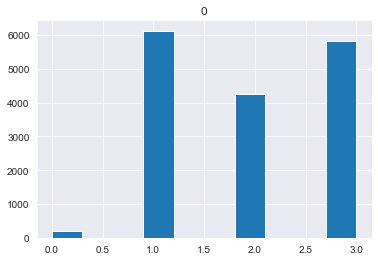

In [68]:
#find which cluster each data point belongs to
clusters = kmeans.predict(X)
pd.DataFrame(clusters).hist()

In [69]:
#add the cluster vector to df, X
X["Cluster"] = clusters

## PCA

In [70]:
#plotX is a DataFrame containing 5000 values sampled randomly from X
plotX = pd.DataFrame(np.array(X.sample(5000)))

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = X.columns

In [71]:
#initialize PCA models

#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

In [72]:
#We build our new DataFrames:

#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [73]:
#Rename the columns of these newly created DataFrames:

PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [74]:
#We concatenate these newly created DataFrames to plotX so that they can be used by plotX as columns.
plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

In [75]:
#And we create one new column for plotX so that we can use it for 1-D visualization.
plotX["dummy"] = 0

In [76]:
#divide our df into three new dfs
cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]
cluster3 = plotX[plotX["Cluster"] == 3]

### PCA Visuals

In [77]:
#This is needed so we can display plotly plots properly
init_notebook_mode(connected=True)

### 1-D

In [78]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'red'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'blue'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'green'),
                    text = None)

#trace4 is for 'Cluster 3'
trace4 = go.Scatter(
                    x = cluster3["PC1_1d"],
                    y = cluster3["dummy"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'yellow'),
                    text = None)

data = [trace1, trace2, trace3, trace4]

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

### 2-D 

In [79]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'red'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'blue'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'green'),
                    text = None)

#trace4 is for 'Cluster 3'
trace4 = go.Scatter(
                    x = cluster3["PC1_2d"],
                    y = cluster3["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'yellow'),
                    text = None)

data = [trace1, trace2, trace3, trace4]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

### 3-D

In [80]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'red'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'blue'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'green'),
                    text = None)

#trace4 is for 'Cluster 3'
trace4 = go.Scatter3d(
                    x = cluster3["PC1_3d"],
                    y = cluster3["PC2_3d"],
                    z = cluster3["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'yellow'),
                    text = None)


data = [trace1, trace2, trace3, trace4]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

## T-SNE

In [92]:
#plotX will hold the values we wish to plot
plotX = pd.DataFrame(np.array(X.sample(5000)))
plotX.columns = X.columns

In [93]:
#Set our perplexity
perplexity = 100

In [94]:
#We initialize our T-SNE models:

#T-SNE with one dimension
tsne_1d = TSNE(n_components=1, perplexity=perplexity)

#T-SNE with two dimensions
tsne_2d = TSNE(n_components=2, perplexity=perplexity)

#T-SNE with three dimensions
tsne_3d = TSNE(n_components=3, perplexity=perplexity)

In [95]:
#We build our new DataFrames to help us visualize our data in 1-D, 2-D, and 3-D space:

#This DataFrame holds a single dimension,built by T-SNE
TCs_1d = pd.DataFrame(tsne_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains two dimensions, built by T-SNE
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three dimensions, built by T-SNE
TCs_3d = pd.DataFrame(tsne_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [96]:
#Rename the columns of these newly created DataFrames:

TCs_1d.columns = ["TC1_1d"]

PCs_1d.columns = ["PC1_1d"]

#"TC1_2d" means: 'The first component of the components created for 2-D visualization, by T-SNE.'
#And "TC2_2d" means: 'The second component of the components created for 2-D visualization, by T-SNE.'
TCs_2d.columns = ["TC1_2d","TC2_2d"]

TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]

In [97]:
#We concatenate these newly created DataFrames to plotX so that they can be used by plotX as columns.

plotX = pd.concat([plotX,TCs_1d,TCs_2d,TCs_3d], axis=1, join='inner')

In [98]:
#And we create one new column for plotX so that we can use it for 1-D visualization.

plotX["dummy"] = 0

In [99]:
#Now we divide our DataFrame, plotX, into three new DataFrames.

cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]

### 1-D

In [100]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in One Dimension Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

### 2-D

In [101]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_2d"],
                    y = cluster0["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_2d"],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_2d"],
                    y = cluster2["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

### 3-D

In [102]:

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["TC1_3d"],
                    y = cluster0["TC2_3d"],
                    z = cluster0["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["TC1_3d"],
                    y = cluster1["TC2_3d"],
                    z = cluster1["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["TC1_3d"],
                    y = cluster2["TC2_3d"],
                    z = cluster2["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Three Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)